In [1]:
# Install and import TF2
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3MB 40kB/s 
     |████████████████████████████████| 3.8MB 33.5MB/s 
     |████████████████████████████████| 450kB 59.0MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.8.2 which is incompatible.
2.0.0


In [0]:
# Load in the dataset from Sklearn
from sklearn.datasets import load_breast_cancer

In [4]:
# Load the data
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [5]:
# Buch is like dictionary, keys act as attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
type(data.data)

numpy.ndarray

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target.shape

(569,)

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
#split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = X_train.shape

In [0]:
# scale the data to 0-1 so that sigmoid can work (model)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1,activation="sigmoid")                              
])
model.compile(optimizer="adam",
  loss="binary_crossentropy",
  metrics=["accuracy"])

In [17]:
# Train the model
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 1ms/sample - loss: 0.9625 - accuracy: 0.3937 - val_loss: 0.8825 - val_accuracy: 0.4309
Epoch 2/100
381/381 [==============================] - 0s 93us/sample - loss: 0.8738 - accuracy: 0.4619 - val_loss: 0.7947 - val_accuracy: 0.5319
Epoch 3/100
381/381 [==============================] - 0s 100us/sample - loss: 0.7930 - accuracy: 0.5197 - val_loss: 0.7184 - val_accuracy: 0.6011
Epoch 4/100
381/381 [==============================] - 0s 101us/sample - loss: 0.7222 - accuracy: 0.5879 - val_loss: 0.6525 - val_accuracy: 0.6277
Epoch 5/100
381/381 [==============================] - 0s 94us/sample - loss: 0.6617 - accuracy: 0.6457 - val_loss: 0.5952 - val_accuracy: 0.6809
Epoch 6/100
381/381 [==============================] - 0s 96us/sample - loss: 0.6077 - accuracy: 0.6877 - val_loss: 0.5470 - val_accuracy: 0.7340
Epoch 7/100
381/381 [==============================] - 0s 98us/sample - loss:

In [18]:
# Evaluate the model . evaluate() returns loss and accuracy
print("Train score: ",model.evaluate(X_train,y_train))
print("Test score: ",model.evaluate(X_test,y_test))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

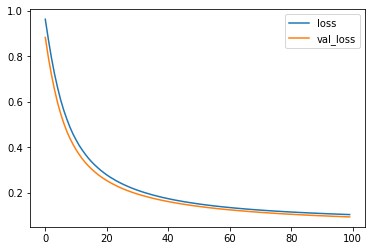

In [20]:
# Plot what was returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend()

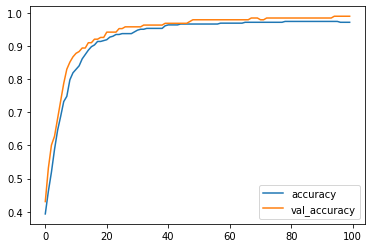

In [21]:
# Plot the accuracy during fit()
plt.plot(r.history['accuracy'],label="accuracy")
plt.plot(r.history['val_accuracy'],label="val_accuracy")
plt.legend()